# Data visualization

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import os
import numpy as np

path = r"C:\Users\hungn\Downloads\archive"

In [2]:
ratings = pd.read_csv(os.path.join(path, 'p_ratings.csv'))
movies = pd.read_csv(os.path.join(path, 'p_movies.csv'))

In [3]:
ratings.head(3)

,Unnamed: 0,userId,movieId,rating
0,0,0,0,1.0
1,1,0,1,4.5
2,2,0,2,5.0


In [4]:
movies.head(5)

,Unnamed: 0,genres,id,title,description,cast,crew,keywords,cast_size,crew_size,director,soup
0,0,"['Animation', 'Comedy', 'Family']",3071,Toy Story,"Led by Woody, Andy's toys live happily in his ...","['tomhanks', 'timallen', 'donrickles']","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","['jealousi', 'toy', 'boy', 'friendship', 'frie...",13,106,"['johnlasseter', 'johnlasseter', 'johnlasseter']",jealousi toy boy friendship friend rivalri boy...
1,1,"['Adventure', 'Fantasy', 'Family']",4406,Jumanji,When siblings Judy and Peter discover an encha...,"['robinwilliams', 'jonathanhyde', 'kirstendunst']","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","['boardgam', 'disappear', ""basedonchildren'sbo...",26,16,"['joejohnston', 'joejohnston', 'joejohnston']",boardgam disappear basedonchildren'sbook newho...
2,5,"['Action', 'Crime', 'Drama', 'Thriller']",1299,Heat,"Obsessive master thief, Neil McCauley leads a ...","['alpacino', 'robertdeniro', 'valkilmer']","[{'credit_id': '52fe4292c3a36847f802916d', 'de...","['robberi', 'detect', 'bank', 'obsess', 'chase...",65,71,"['michaelmann', 'michaelmann', 'michaelmann']",robberi detect bank obsess chase shoot thief h...
3,9,"['Adventure', 'Action', 'Thriller']",2196,GoldenEye,James Bond must unmask the mysterious head of ...,"['piercebrosnan', 'seanbean', 'izabellascorupco']","[{'credit_id': '52fe426ec3a36847f801e14b', 'de...","['cuba', 'falselyaccus', 'secretident', 'compu...",20,46,"['martincampbell', 'martincampbell', 'martinca...",cuba falselyaccus secretident computervirus se...
4,14,"['Action', 'Adventure']",322,Cutthroat Island,"Morgan Adams and her slave, William Shaw, are ...","['geenadavis', 'matthewmodine', 'franklangella']","[{'credit_id': '52fe42f4c3a36847f802f69f', 'de...","['exoticisland', 'treasur', 'map', 'ship', 'sc...",31,16,"['rennyharlin', 'rennyharlin', 'rennyharlin']",exoticisland treasur map ship scalp pirat geen...


In [5]:
movie_ids_in_ratings = ratings['movieId'].unique()
print(f"Number of movie IDs in ratings dataframe: {len(movie_ids_in_ratings)}")
movie_ids_in_movies = movies['id'].unique()
print(f"Number of movie IDs in movies dataframe: {len(movie_ids_in_movies)}")
missing_ids_ratings = [movie_id for movie_id in movie_ids_in_ratings 
                     if movie_id not in movie_ids_in_movies]
missing_ids_movies = [movie_id for movie_id in movie_ids_in_movies 
                     if movie_id not in movie_ids_in_ratings]
print(f"Number of movie IDs present in ratings but missing from movies: {len(missing_ids_ratings)}")
print(f"Percentage of missing movies: {len(missing_ids_ratings) / len(movie_ids_in_ratings) * 100:.2f}%")

print(f"Number of movie IDs present in movies but missing from ratings: {len(missing_ids_movies)}")
print(f"Percentage of missing movies: {len(missing_ids_movies) / len(movie_ids_in_movies) * 100:.2f}%")

Number of movie IDs in ratings dataframe: 7565
Number of movie IDs in movies dataframe: 7565
Number of movie IDs present in ratings but missing from movies: 0
Percentage of missing movies: 0.00%
Number of movie IDs present in movies but missing from ratings: 0
Percentage of missing movies: 0.00%


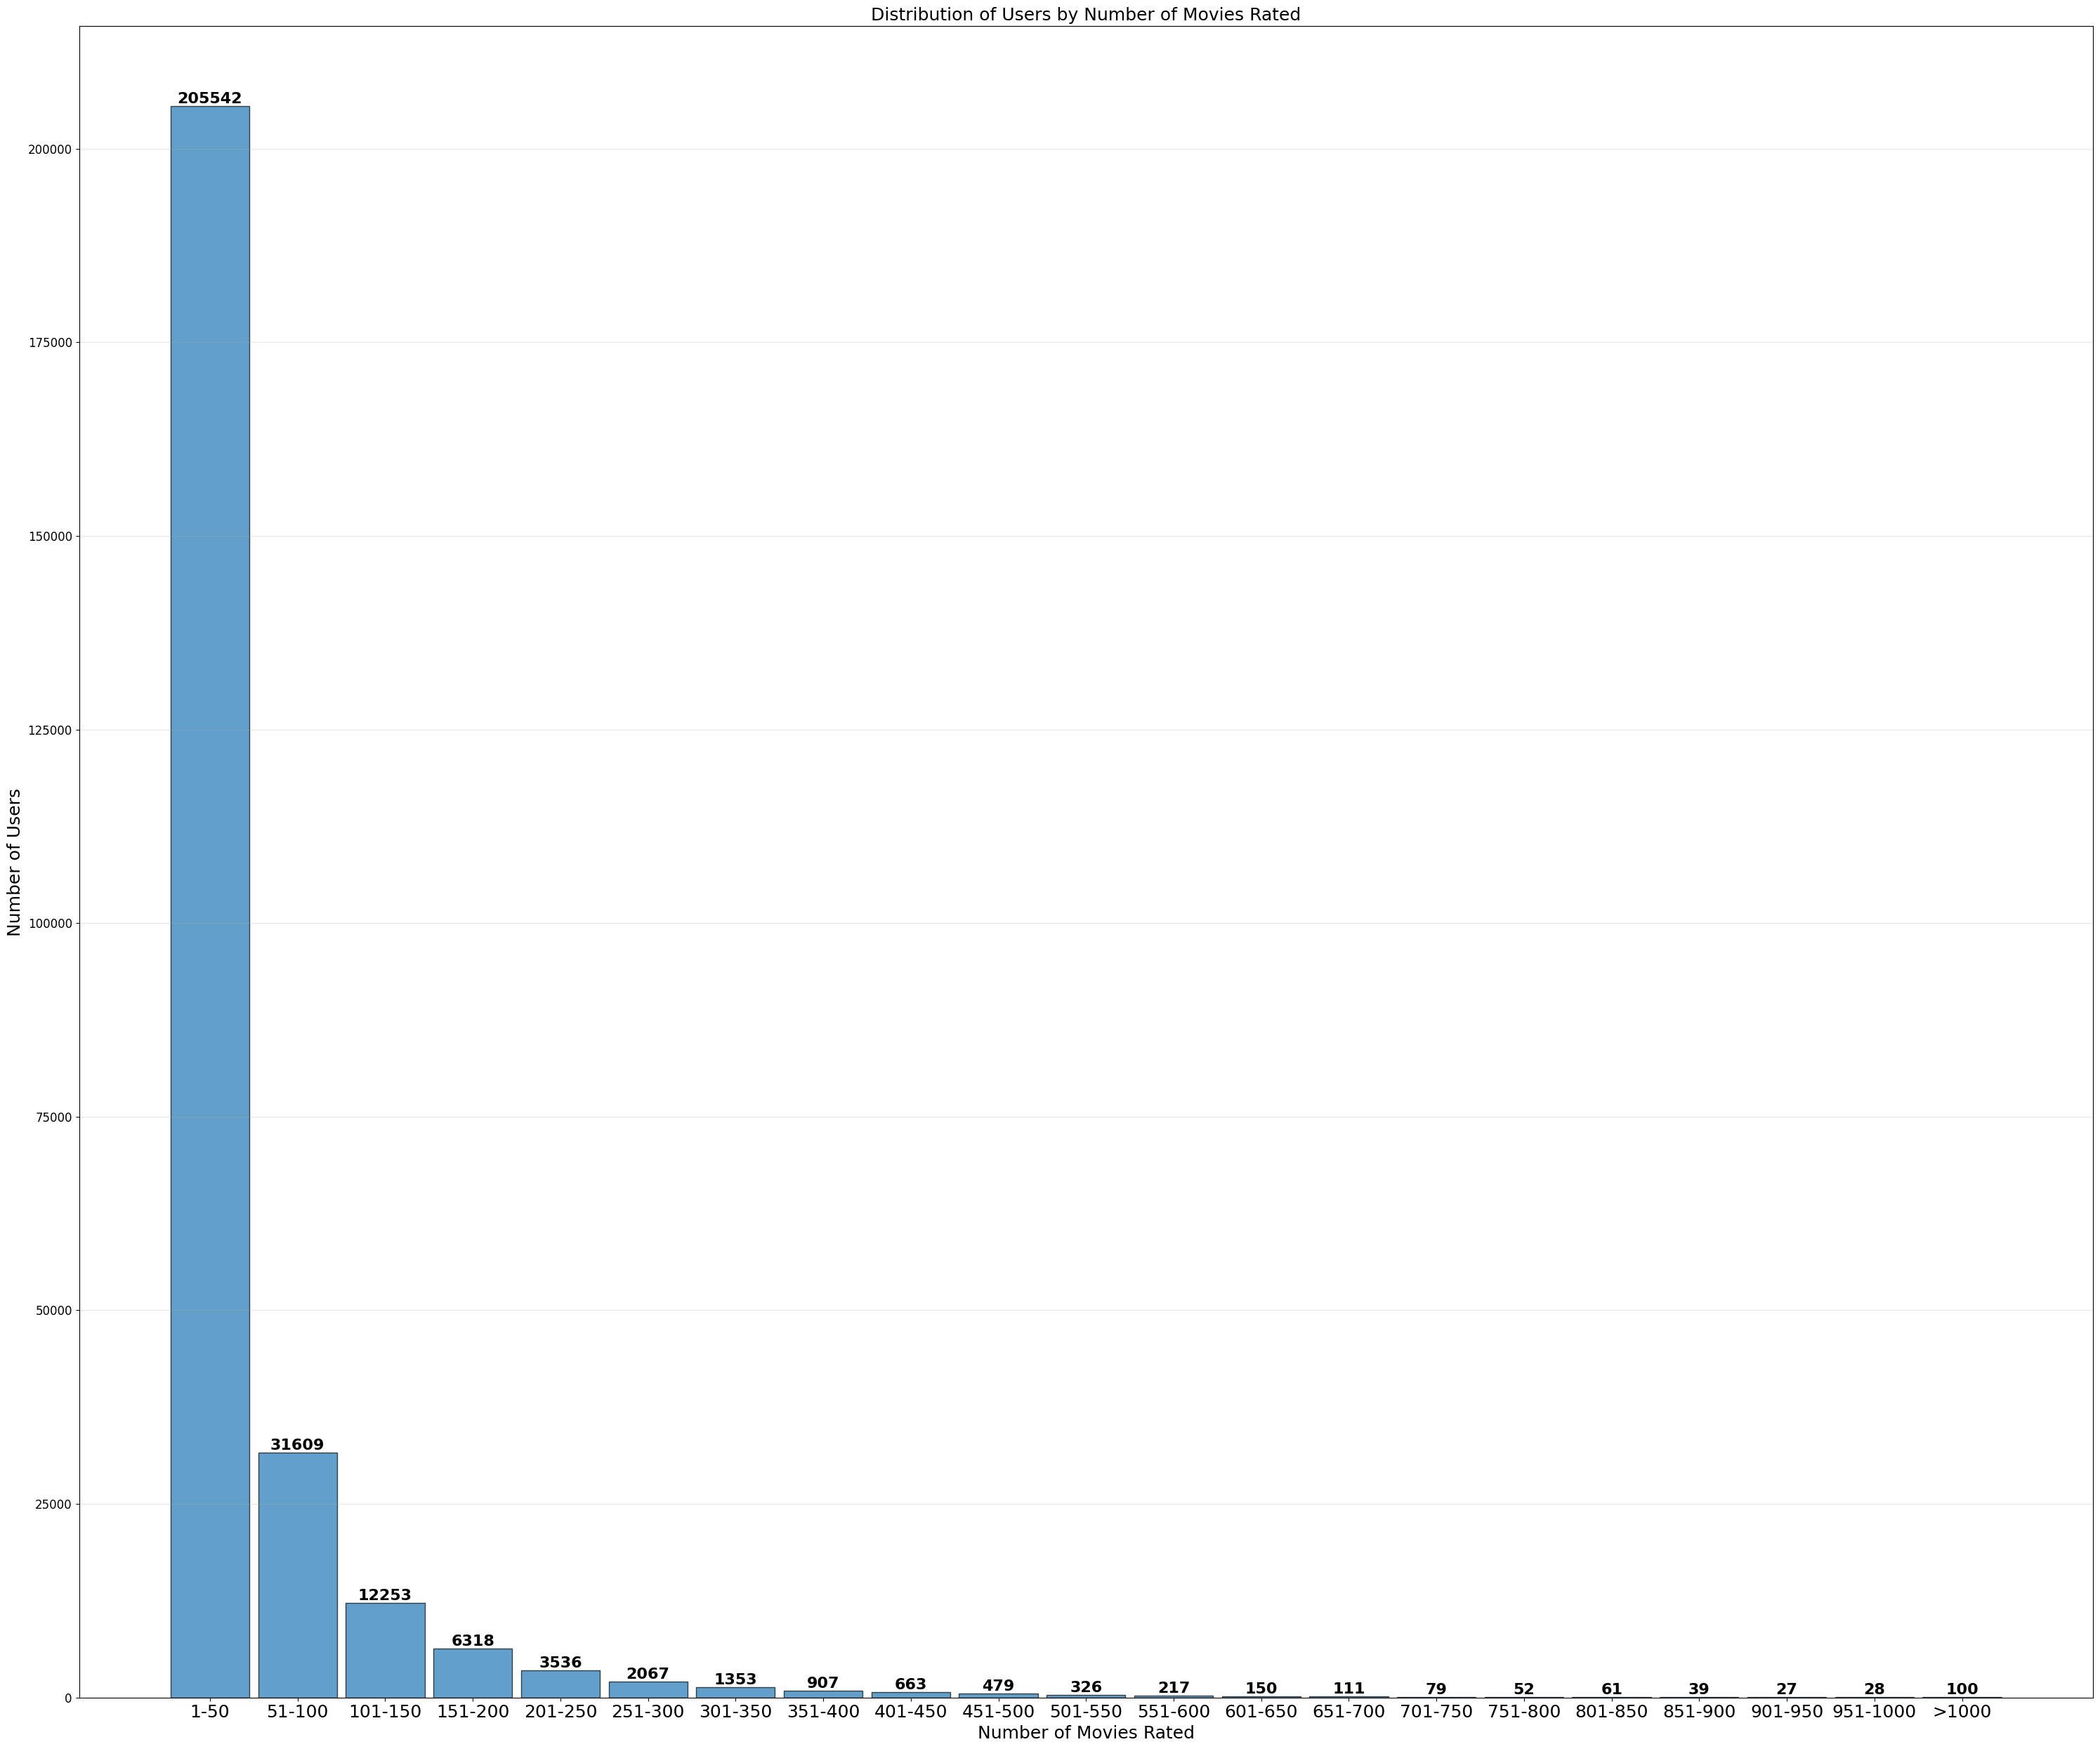

In [6]:
df = ratings
user_rating_counts = df.groupby('userId').size().reset_index(name='movies_rated')

# Cap the ratings at 1000 for binning purposes
user_rating_counts_capped = user_rating_counts.copy()
user_rating_counts_capped.loc[user_rating_counts_capped['movies_rated'] > 1000, 'movies_rated'] = 1001

interval_size = 50  
bins = list(np.arange(1, 1001, interval_size)) + [1001, 1051]  # Last bin spans 50 units

counts, edges = np.histogram(user_rating_counts_capped['movies_rated'], bins=bins)

# Calculate bin centers and widths
bin_widths = np.diff(edges)
bin_centers = edges[:-1] + bin_widths / 2

# Plot
plt.figure(figsize=(30, 25))
plt.bar(bin_centers, counts, width=bin_widths * 0.9, edgecolor='black', alpha=0.7)

# Add count labels
for i in range(len(counts)):
    if counts[i] > 0:
        plt.text(bin_centers[i], counts[i], f'{int(counts[i])}',
                 ha='center', va='bottom', fontweight='bold', fontsize=16)

# Create interval labels
interval_labels = [
    f'{int(edges[i])}-{int(edges[i+1]-1)}' if edges[i+1] <= 1001 else '>1000'
    for i in range(len(edges) - 1)
]

plt.xlabel('Number of Movies Rated', fontsize=18)
plt.ylabel('Number of Users', fontsize=18)
plt.title('Distribution of Users by Number of Movies Rated', fontsize=18)
plt.grid(axis='y', alpha=0.3)

plt.xticks(bin_centers, interval_labels, rotation=0, ha='center', fontsize=18)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.savefig('1.png')
plt.show()


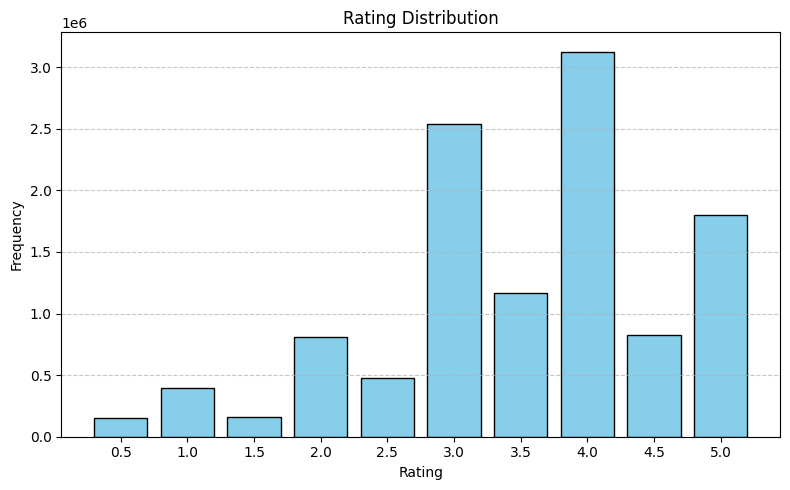

In [7]:
rating_counts = ratings['rating'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
bars = plt.bar(rating_counts.index, rating_counts.values, 
               color='skyblue', edgecolor='black', width=0.4)  # Thinner bars

plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Rating Distribution')
plt.xticks(rating_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('2.png')
plt.show()

C:\Users\hungn\AppData\Local\Temp\ipykernel_13988\1874847456.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  movies_per_interval = movie_rating_counts.groupby('rating_interval')['movieId'].count().reset_index()


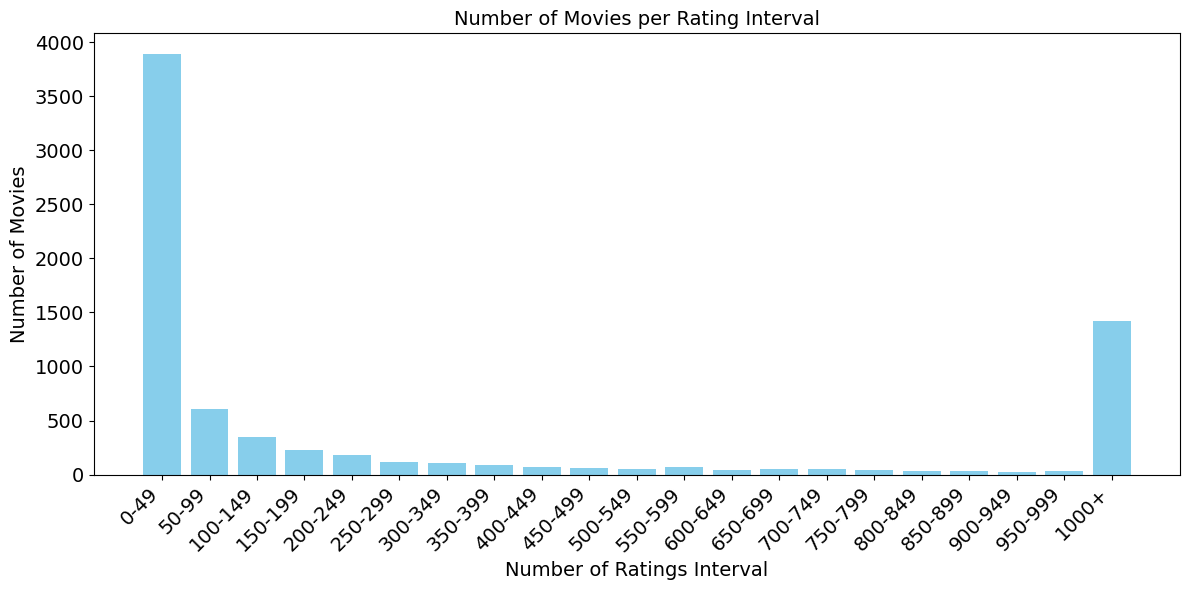

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Count number of ratings per movie
movie_rating_counts = ratings.groupby('movieId')['rating'].count().reset_index()
movie_rating_counts.rename(columns={'rating': 'num_ratings'}, inplace=True)

# Step 2: Define bins for number of ratings up to 1000
bins = list(range(0, 1001, 50))  # [0, 50, ..., 1000]
labels = [f'{i}-{i+49}' for i in bins[:-1]]

# Step 3: Bin movies with 0–999 ratings
movie_rating_counts['rating_interval'] = pd.cut(
    movie_rating_counts['num_ratings'],
    bins=bins,
    labels=labels,
    right=False
)

# Step 4: Count movies in each interval
movies_per_interval = movie_rating_counts.groupby('rating_interval')['movieId'].count().reset_index()
movies_per_interval.rename(columns={'movieId': 'num_movies'}, inplace=True)

# Step 5: Add a row for movies with >1000 ratings
num_movies_over_1000 = (movie_rating_counts['num_ratings'] > 1000).sum()
over_1000_row = pd.DataFrame([{'rating_interval': '1000+', 'num_movies': num_movies_over_1000}])
movies_per_interval = pd.concat([movies_per_interval, over_1000_row], ignore_index=True)

# Step 6: Sort intervals correctly for plotting
def get_sort_key(interval):
    if interval == '1000+':
        return float('inf')  # Push this to the end
    return int(str(interval).split('-')[0])

movies_per_interval['sort_order'] = movies_per_interval['rating_interval'].apply(get_sort_key)
movies_per_interval = movies_per_interval.sort_values('sort_order').drop(columns='sort_order')

# Step 7: Plot the distribution
plt.figure(figsize=(12, 6))
plt.bar(movies_per_interval['rating_interval'], movies_per_interval['num_movies'], color='skyblue')

plt.xlabel('Number of Ratings Interval', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.title('Number of Movies per Rating Interval', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('3.png')
plt.show()
